In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Penguins

In this exercise, we will explore the palmerpenguins dataset.


*Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081*

In [3]:
df = pd.read_csv('../problems/data/penguins.csv')
print(df.head())

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


### Part 5.1
Load the data. Impute missing values of the numerical features, for example by replacing them with the mean value for the respective feature.

In [4]:
print(np.unique(df['species']))
cols = df.select_dtypes(include=['number']).columns
for col in df[cols]:
    if df[col].isnull().values.any():
        df[col].fillna(df[col].mean(), inplace=True)

['Adelie' 'Chinstrap' 'Gentoo']


### Part 5.2
Select only the samples belonging to the species Gentoo. Consider the variables flipper length mm, body mass g, bill length mm, bill depth mm and find the corellations between each pair. 

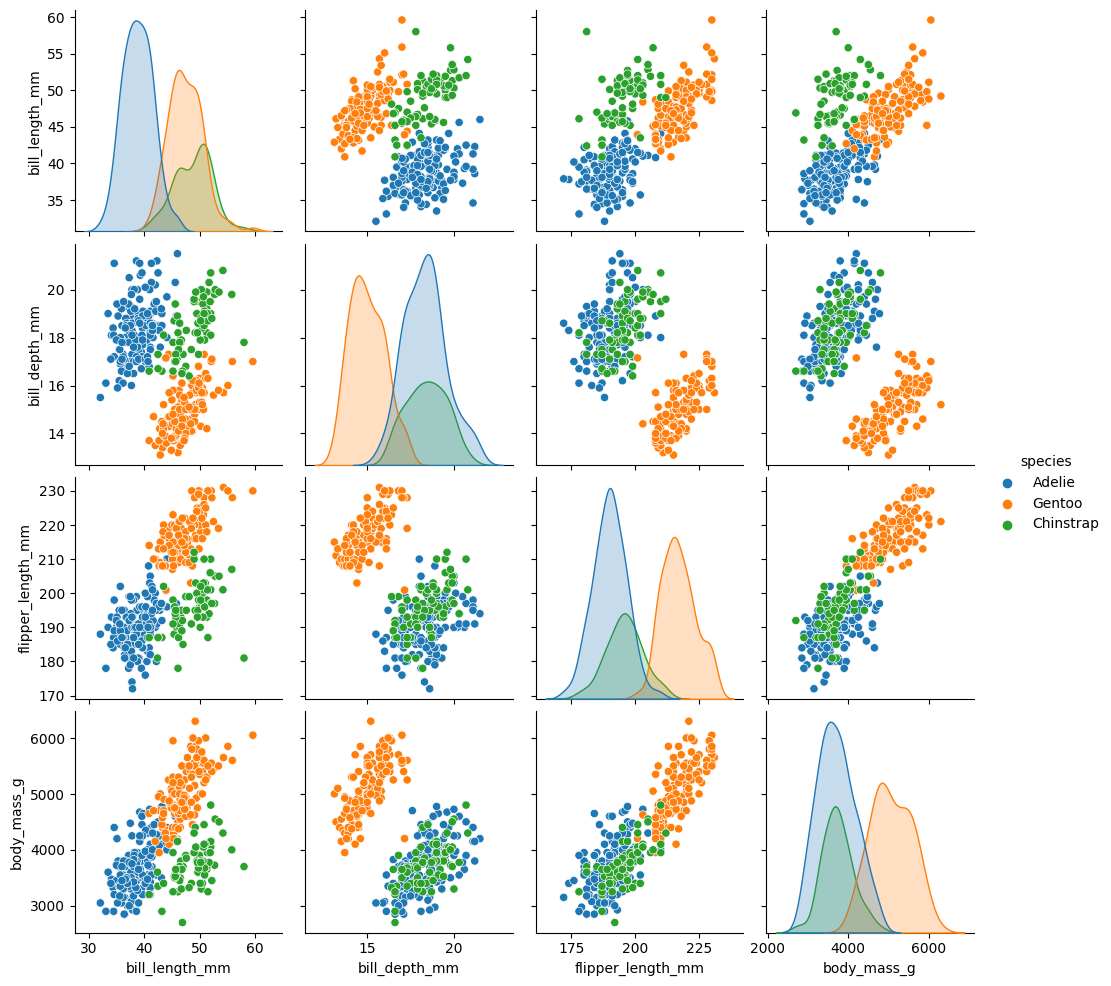

In [ ]:
# Opt. some visualization
cols = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'species']

import seaborn as sns 
sns.pairplot(df[cols], hue='species')

In [ ]:
df_gentoo = df.loc[(df['species'] == 'Gentoo')]
X1 = df_gentoo['flipper_length_mm']
X2 = df_gentoo['bill_length_mm']
print(df.corr(method='pearson')) 

Which pair appears to be most highly corellated?

For Gentoo, `flipper_length_mm` and `body_mass_g` appear the most correlated (0.87).

### Part 5.3 
Fit a linear model predicting `body_mass_g` from  `bill_depth_mm` for the species Gentoo and show the linear parameters.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()

y = np.array(df_gentoo['body_mass_g'])
X = np.array(df_gentoo['bill_depth_mm']).reshape(-1,1)

# Linear model 
linear_model.fit(X, y)  
beta = linear_model.coef_[0]

# R2 score
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred)

print(f'Coefficient: {np.round(beta, 2)}, R2-score: {np.round(r2, 2)}')

Coefficient: 339.92, R2-score: 0.44


What are the linear parameters and how do you judge the goodness of fit?

See above. The R2 score suggests that there is corellation (R2 > 0.4) but the linear model fit is not perfect (R < 1).

### Part 5.4
Now consider the pair of variables `body_mass_g`  and  `bill_depth_mm` over *all* penguin species. Perform a hypothesis test on whether there is  	statistically significant relationship between the predictors. What problem do you see? *Hint: Consider visualizing the relationship between the variables using a scatterplot.*

Corel_test(body_mass_g,bill_depth_mm, all species): False
Corel_test(body_mass_g,bill_depth_mm), only Bentoo: True
Coefficient: -191.64, R2-score: 0.22


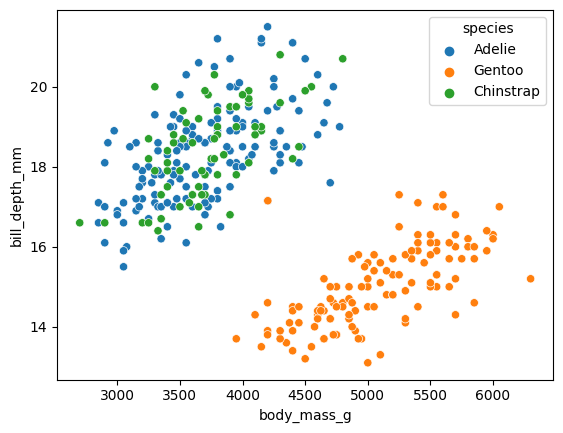

In [12]:

def corel_t_test(X, y):
    from scipy.stats import t
    N = len(y)
 
    R = np.corrcoef(X, y)[0, 1]

    t_val = R / np.sqrt((1 - R**2) / (N - 2))
    p_val_lower = t.cdf(-np.abs(t_val), N-2)
    p_val_upper = 1 - t.cdf(t_val, N-2)
    p_val = p_val_lower + p_val_upper
    return p_val

x1 = 'body_mass_g'
x2 = 'bill_depth_mm'
alpha = 0.05

p_val_allspecies = corel_t_test(df[x1], df[x2])
print(f'Corel_test({x1},{x2}, all species): {p_val_allspecies<alpha}') 

#Opt.
p_val_gentoo = corel_t_test(df_gentoo[x1], df_gentoo[x2])
print(f'Corel_test({x1},{x2}), only Bentoo: {p_val_gentoo<alpha}') 

# Opt. visualization
sns.scatterplot(x=x1,y=x2, data=df, hue='species')

# Opt. for comparison, linear model coefficients
y = np.array(df[x1])
X = np.array(df[x2]).reshape(-1,1)
linear_model.fit(X, y) 
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred) 

print(f'Coefficient: {np.round(linear_model.coef_[0], 2)}, R2-score: {np.round(r2, 2)}')
 

Is there a significant relationship and what problem do you see?

There is not a significant relationship according to our corellation test (at $\alpha=0.05$). We also now obtain a *negative* coefficient  $\beta = -191.6$, compared to before $\beta = 339.9$, along with a lower R2. As we can see in the plot, Gentoo is different in distribution from the other species, such that if we fit a line on all data, we obtain a negative slope. If we do the analysis per species, the slope is positive and we discover a significant corellation.

### Part 5.5 
Consider again the species Gentoo. Suppose we observe a new penguin with bill length of 17. Using the body mass of its four closest neighbors (in terms of the bill lengths), predict the body mass of the new penguin.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
y = np.array(df_gentoo[x1])
X = np.array(df_gentoo[x2]).reshape(-1,1)
knn.fit(X, y)
print(knn.predict([[17]])) 

[5650.]


### Part 5.6
Plot the RSS of a $k$NN regression predicting `body_mass_g`  from  `bill_depth_mm` for different choices of $k$ $(k \in \{1, ...,10\})$.

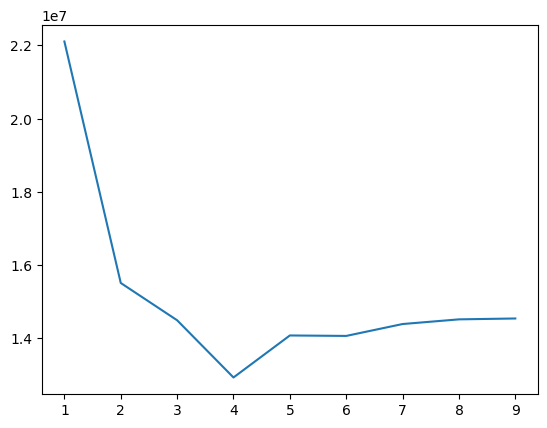

In [15]:
rss = [0 for _ in range(1,10)]
for k_i, k in enumerate(range(1,10)):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)  
    rss[k_i] = np.sum(np.square(y-y_pred))
plt.plot(range(1,10),rss)

Which $k$ would you choose and why?

The plot suggests $k=4.$